### Ultralytics Yolo v3 설치

In [ ]:
# 모델 다운로드
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 12088, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 12088 (delta 22), reused 15 (delta 15), pack-reused 12034 (from 3)
Receiving objects: 100% (12088/12088), 10.65 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (8199/8199), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━

In [ ]:
# torch 버전과 gpu 사용 가능 여부 확인
from IPython.display import Image, clear_output  # to display images
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.5.1+cu124 (Tesla T4)


### 이미지 Detection

In [ ]:
# object detection 수행.
# --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨. (첫번째-exp, 두번째-exp2 ...)
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함.

# 요약
# yolov3.pt 가중치 모델을 로드.
# data/images 폴더 내 이미지를 640x640 크기로 변환.
# object detection 수행 (conf 0.25 이상의 객체만 출력)
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['yolov3.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-251-g1701398 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

100% 119M/119M [00:02<00:00, 42.3MB/s]

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients, 155.9 GFLOPs
image 1/2 /content/

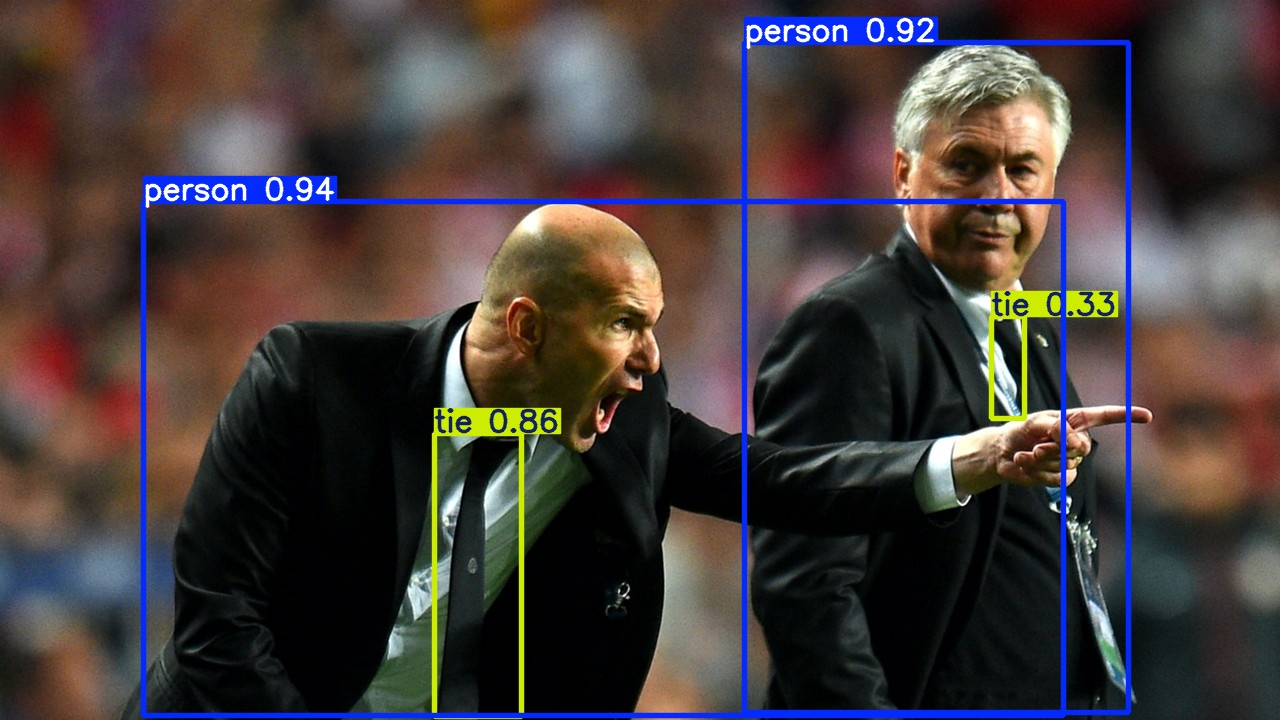

In [ ]:
# 수행 결과 시각화
from IPython.display import Image, clear_output

Image(filename='yolov3/runs/detect/exp/zidane.jpg', width=600)

### Video Detection

In [ ]:
# 입력 영상 다운로드
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2025-03-02 10:36:44--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/Night_Day_Chase.mp4 [following]
--2025-03-02 10:36:45--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/Night_Day_Chase.mp4 [following]
--2025-03-02 10:36:45--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

In [ ]:
# --project를 /content/data/run_video로 설정하여 Detect된 영상을 저장.
# detect.py의 source가 mp4이면 자동으로 Video Detection 수행.
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/Night_Day_Chase.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-251-g1701398 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients, 155.9 GFLOPs
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 67.2ms
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 39.7ms
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 39.7ms
video 1/1 (4/1383) /content/data/Night_Day_Chase.mp4: 288x